## Malicious Website Classification

Given *data about various websites*, let's try to detect **malicious websites** in the data.

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/xwolf12/malicious-and-benign-websites

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
data = pd.read_csv('archive/dataset.csv')
data

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


### Preprocessing

In [5]:
df = data.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
df.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [8]:
df = df.drop('URL', axis=1)

In [9]:
df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [13]:
# Extract datetime features
for column in ['WHOIS_UPDATED_DATE', 'WHOIS_REGDATE']:
    df[column] = pd.to_datetime(df[column], errors='coerce')

In [14]:
df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,NaN,NaN,2015-10-10 18:21:00,NaT,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaT,NaT,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaT,NaT,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,1997-07-10 04:00:00,2013-12-09 00:45:00,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,NaN,124140.0,US,TX,1996-12-05 00:00:00,2017-11-04 00:00:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,Barcelona,NaT,2016-02-09 00:00:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,NaN,ES,Barcelona,NaT,2016-02-09 00:00:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,NaT,NaT,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1998-01-04 00:00:00,2016-09-12 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0


In [15]:
df['REG_YEAR'] = df['WHOIS_REGDATE'].apply(lambda x: x.year)

In [17]:
df['REG_MONTH'] = df['WHOIS_REGDATE'].apply(lambda x: x.month)
df['REG_DAY'] = df['WHOIS_REGDATE'].apply(lambda x: x.day)
df['REG_HOUR'] = df['WHOIS_REGDATE'].apply(lambda x: x.hour)
df['REG_MINUTE'] = df['WHOIS_REGDATE'].apply(lambda x: x.minute)
df = df.drop('WHOIS_REGDATE', axis=1)

In [18]:
df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,REG_YEAR,REG_MONTH,REG_DAY,REG_HOUR,REG_MINUTE
0,16,7,iso-8859-1,nginx,263.0,NaN,NaN,NaT,7,0,2,700,9,10,1153,832,9,2.0,1,2015.0,10.0,10.0,18.0,21.0
1,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaT,17,7,4,1230,17,19,1265,1230,17,0.0,0,NaN,NaN,NaN,NaN,NaN
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaT,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,17,6,ISO-8859-1,nginx,162.0,US,AK,2013-12-09 00:45:00,31,22,3,3812,39,37,18784,4380,39,8.0,0,1997.0,7.0,10.0,4.0,0.0
4,17,6,UTF-8,NaN,124140.0,US,TX,2017-11-04 00:00:00,57,2,5,4278,61,62,129889,4586,61,4.0,0,1996.0,12.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,Barcelona,2016-02-09 00:00:00,0,0,0,0,0,3,186,0,0,0.0,1,NaN,NaN,NaN,NaN,NaN
1777,198,17,UTF-8,Apache,NaN,ES,Barcelona,2016-02-09 00:00:00,0,0,0,0,0,2,124,0,0,0.0,1,NaN,NaN,NaN,NaN,NaN
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,NaT,83,2,6,6631,87,89,132181,6945,87,4.0,0,NaN,NaN,NaN,NaN,NaN
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,2016-09-12 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,1998.0,1.0,4.0,0.0,0.0


In [19]:
df['UPD_YEAR'] = df['WHOIS_UPDATED_DATE'].apply(lambda x: x.year)
df['UPD_MONTH'] = df['WHOIS_UPDATED_DATE'].apply(lambda x: x.month)
df['UPD_DAY'] = df['WHOIS_UPDATED_DATE'].apply(lambda x: x.day)
df['UPD_HOUR'] = df['WHOIS_UPDATED_DATE'].apply(lambda x: x.hour)
df['UPD_MINUTE'] = df['WHOIS_UPDATED_DATE'].apply(lambda x: x.minute)
df = df.drop('WHOIS_UPDATED_DATE', axis=1)

In [20]:
df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,REG_YEAR,REG_MONTH,REG_DAY,REG_HOUR,REG_MINUTE,UPD_YEAR,UPD_MONTH,UPD_DAY,UPD_HOUR,UPD_MINUTE
0,16,7,iso-8859-1,nginx,263.0,NaN,NaN,7,0,2,700,9,10,1153,832,9,2.0,1,2015.0,10.0,10.0,18.0,21.0,NaN,NaN,NaN,NaN,NaN
1,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0,1997.0,7.0,10.0,4.0,0.0,2013.0,12.0,9.0,0.0,45.0
4,17,6,UTF-8,NaN,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0,1996.0,12.0,5.0,0.0,0.0,2017.0,11.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,Barcelona,0,0,0,0,0,3,186,0,0,0.0,1,NaN,NaN,NaN,NaN,NaN,2016.0,2.0,9.0,0.0,0.0
1777,198,17,UTF-8,Apache,NaN,ES,Barcelona,0,0,0,0,0,2,124,0,0,0.0,1,NaN,NaN,NaN,NaN,NaN,2016.0,2.0,9.0,0.0,0.0
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,83,2,6,6631,87,89,132181,6945,87,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,0,0,0,0,0,0,0,0,0,0.0,0,1998.0,1.0,4.0,0.0,0.0,2016.0,9.0,12.0,0.0,0.0


In [21]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'CHARSET': 9, 'SERVER': 239, 'WHOIS_COUNTRY': 49, 'WHOIS_STATEPRO': 182}

In [22]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [34]:
# One-hot encode categorical features
for column in ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']:
    df[column] = df[column].apply(lambda x: x.lower() if str(x) != 'nan' else x)

In [35]:
df = onehot_encode(
    df,
    column_dict = {
        'CHARSET': 'CH',
        'SERVER': 'SV',
        'WHOIS_COUNTRY': 'WC',
        'WHOIS_STATEPRO': 'WS'
    }
)

In [36]:
df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,REG_YEAR,REG_MONTH,REG_DAY,REG_HOUR,REG_MINUTE,UPD_YEAR,UPD_MONTH,UPD_DAY,UPD_HOUR,UPD_MINUTE,CH_iso-8859,CH_iso-8859-1,CH_us-ascii,CH_utf-8,CH_windows-1251,CH_windows-1252,SV_.v01 apache,SV_294,SV_aeria games & entertainment,SV_akamaighost,SV_amazons3,SV_apache,SV_apache-coyote/1.1,SV_apache/1.3.27 (unix) (red-hat/linux) mod_perl/1.26 php/4.3.3 frontpage/5.0.2 mod_ssl/2.8.12 openssl/0.9.6b,SV_apache/1.3.27 (unix) php/4.4.1,SV_apache/1.3.31 (unix) php/4.3.9 mod_perl/1.29 rus/pl30.20,SV_apache/1.3.33 (unix) mod_ssl/2.8.24 openssl/0.9.7e-p1 php/4.4.8,SV_apache/1.3.34 (unix) php/4.4.4,SV_apache/1.3.37 (unix) mod_perl/1.29 mod_ssl/2.8.28 openssl/0.9.7e-p1,SV_apache/1.3.39 (unix) php/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a frontpage/5.0.2.2635 dav/1.0.3 mod_ssl/2.8.30 openssl/0.9.7a,SV_apache/1.3.42 ben-ssl/1.60 (unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 chili!soft-asp/3.6.2 frontpage/5.0.2.2635 mod_perl/1.31 php/4.4.9,SV_apache/2,SV_apache/2.0.52 (red hat),SV_apache/2.0.63 (unix) mod_ssl/2.0.63 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.3.6,SV_apache/2.2.0 (fedora),SV_apache/2.2.10 (linux/suse),SV_apache/2.2.11 (unix) php/5.2.6,SV_apache/2.2.13 (unix) mod_ssl/2.2.13 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.2.10,SV_apache/2.2.14 (freebsd) mod_ssl/2.2.14 openssl/0.9.8y dav/2 php/5.2.12 with suhosin-patch,SV_apache/2.2.14 (ubuntu),SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8a,SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8e-fips-rhel5,SV_apache/2.2.15 (centos),SV_apache/2.2.15 (centos) dav/2 mod_ssl/2.2.15 openssl/1.0.1e-fips php/5.3.3,SV_apache/2.2.15 (red hat),SV_apache/2.2.16 (debian),SV_apache/2.2.16 (unix) mod_ssl/2.2.16 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4,SV_apache/2.2.20 (unix),SV_apache/2.2.21 (unix) mod_ssl/2.2.21 openssl/0.9.8e-fips-rhel5 php/5.3.10,SV_apache/2.2.22,SV_apache/2.2.22 (debian),SV_apache/2.2.22 (debian) mod_python/3.3.1 python/2.7.3 mod_ssl/2.2.22 openssl/1.0.1t,SV_apache/2.2.22 (ubuntu),SV_apache/2.2.23 (amazon),SV_apache/2.2.24 (unix) dav/2 php/5.3.26 mod_ssl/2.2.24 openssl/0.9.8y,SV_apache/2.2.25 (unix) mod_ssl/2.2.25 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4 php/5.4.26,SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/1.0.1e-fips dav/2 mod_bwlimited/1.4,SV_apache/2.2.27 (centos),SV_apache/2.2.27 (unix) openam web agent/4.0.1-1 mod_ssl/2.2.27 openssl/1.0.1p php/5.3.28,SV_apache/2.2.29 (amazon),SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips dav/2 mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4 php/5.4.35,SV_apache/2.2.3 (centos),SV_apache/2.2.3 (red hat),SV_apache/2.2.31 (amazon),SV_apache/2.2.31 (centos),SV_apache/2.2.31 (freebsd) php/5.4.15 mod_ssl/2.2.31 openssl/1.0.2d dav/2,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_fcgid/2.3.9,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_perl/2.0.8 perl/v5.10.1,SV_apache/2.2.32,SV_apache/2.4,SV_apache/2.4.10,SV_apache/2.4.10 (debian),SV_apache/2.4.10 (debian) php/5.6.30-0+deb8u1 mod_perl/2.0.9dev perl/v5.20.2,SV_apache/2.4.10 (ubuntu),SV_apache/2.4.10 (unix) openssl/1.0.1k,SV_apache/2.4.12 (ubuntu),SV_apache/2.4.12 (unix) openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.4.16 (ubuntu),SV_apache/2.4.17 (unix) openssl/1.0.1e-fips ph

In [40]:
# Fill missing values 
missing_value_columns = df.loc[:, df.isna().sum()>0].columns
missing_value_columns

Index(['CONTENT_LENGTH', 'DNS_QUERY_TIMES', 'REG_YEAR', 'REG_MONTH', 'REG_DAY',
       'REG_HOUR', 'REG_MINUTE', 'UPD_YEAR', 'UPD_MONTH', 'UPD_DAY',
       'UPD_HOUR', 'UPD_MINUTE'],
      dtype='object')

In [41]:
for column in missing_value_columns:
    df[column] = df[column].fillna(df[column].mean())

In [42]:
df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,REG_YEAR,REG_MONTH,REG_DAY,REG_HOUR,REG_MINUTE,UPD_YEAR,UPD_MONTH,UPD_DAY,UPD_HOUR,UPD_MINUTE,CH_iso-8859,CH_iso-8859-1,CH_us-ascii,CH_utf-8,CH_windows-1251,CH_windows-1252,SV_.v01 apache,SV_294,SV_aeria games & entertainment,SV_akamaighost,SV_amazons3,SV_apache,SV_apache-coyote/1.1,SV_apache/1.3.27 (unix) (red-hat/linux) mod_perl/1.26 php/4.3.3 frontpage/5.0.2 mod_ssl/2.8.12 openssl/0.9.6b,SV_apache/1.3.27 (unix) php/4.4.1,SV_apache/1.3.31 (unix) php/4.3.9 mod_perl/1.29 rus/pl30.20,SV_apache/1.3.33 (unix) mod_ssl/2.8.24 openssl/0.9.7e-p1 php/4.4.8,SV_apache/1.3.34 (unix) php/4.4.4,SV_apache/1.3.37 (unix) mod_perl/1.29 mod_ssl/2.8.28 openssl/0.9.7e-p1,SV_apache/1.3.39 (unix) php/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a frontpage/5.0.2.2635 dav/1.0.3 mod_ssl/2.8.30 openssl/0.9.7a,SV_apache/1.3.42 ben-ssl/1.60 (unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 chili!soft-asp/3.6.2 frontpage/5.0.2.2635 mod_perl/1.31 php/4.4.9,SV_apache/2,SV_apache/2.0.52 (red hat),SV_apache/2.0.63 (unix) mod_ssl/2.0.63 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.3.6,SV_apache/2.2.0 (fedora),SV_apache/2.2.10 (linux/suse),SV_apache/2.2.11 (unix) php/5.2.6,SV_apache/2.2.13 (unix) mod_ssl/2.2.13 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.2.10,SV_apache/2.2.14 (freebsd) mod_ssl/2.2.14 openssl/0.9.8y dav/2 php/5.2.12 with suhosin-patch,SV_apache/2.2.14 (ubuntu),SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8a,SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8e-fips-rhel5,SV_apache/2.2.15 (centos),SV_apache/2.2.15 (centos) dav/2 mod_ssl/2.2.15 openssl/1.0.1e-fips php/5.3.3,SV_apache/2.2.15 (red hat),SV_apache/2.2.16 (debian),SV_apache/2.2.16 (unix) mod_ssl/2.2.16 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4,SV_apache/2.2.20 (unix),SV_apache/2.2.21 (unix) mod_ssl/2.2.21 openssl/0.9.8e-fips-rhel5 php/5.3.10,SV_apache/2.2.22,SV_apache/2.2.22 (debian),SV_apache/2.2.22 (debian) mod_python/3.3.1 python/2.7.3 mod_ssl/2.2.22 openssl/1.0.1t,SV_apache/2.2.22 (ubuntu),SV_apache/2.2.23 (amazon),SV_apache/2.2.24 (unix) dav/2 php/5.3.26 mod_ssl/2.2.24 openssl/0.9.8y,SV_apache/2.2.25 (unix) mod_ssl/2.2.25 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4 php/5.4.26,SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/1.0.1e-fips dav/2 mod_bwlimited/1.4,SV_apache/2.2.27 (centos),SV_apache/2.2.27 (unix) openam web agent/4.0.1-1 mod_ssl/2.2.27 openssl/1.0.1p php/5.3.28,SV_apache/2.2.29 (amazon),SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips dav/2 mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4 php/5.4.35,SV_apache/2.2.3 (centos),SV_apache/2.2.3 (red hat),SV_apache/2.2.31 (amazon),SV_apache/2.2.31 (centos),SV_apache/2.2.31 (freebsd) php/5.4.15 mod_ssl/2.2.31 openssl/1.0.2d dav/2,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_fcgid/2.3.9,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_perl/2.0.8 perl/v5.10.1,SV_apache/2.2.32,SV_apache/2.4,SV_apache/2.4.10,SV_apache/2.4.10 (debian),SV_apache/2.4.10 (debian) php/5.6.30-0+deb8u1 mod_perl/2.0.9dev perl/v5.20.2,SV_apache/2.4.10 (ubuntu),SV_apache/2.4.10 (unix) openssl/1.0.1k,SV_apache/2.4.12 (ubuntu),SV_apache/2.4.12 (unix) openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.4.16 (ubuntu),SV_apache/2.4.17 (unix) openssl/1.0.1e-fips ph

In [44]:
df.isna().sum().sum()

np.int64(0)

In [45]:
# Split df into X and y
y = df['Type'].copy()
X = df.drop('Type', axis=1).copy()

In [46]:
X

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,REG_YEAR,REG_MONTH,REG_DAY,REG_HOUR,REG_MINUTE,UPD_YEAR,UPD_MONTH,UPD_DAY,UPD_HOUR,UPD_MINUTE,CH_iso-8859,CH_iso-8859-1,CH_us-ascii,CH_utf-8,CH_windows-1251,CH_windows-1252,SV_.v01 apache,SV_294,SV_aeria games & entertainment,SV_akamaighost,SV_amazons3,SV_apache,SV_apache-coyote/1.1,SV_apache/1.3.27 (unix) (red-hat/linux) mod_perl/1.26 php/4.3.3 frontpage/5.0.2 mod_ssl/2.8.12 openssl/0.9.6b,SV_apache/1.3.27 (unix) php/4.4.1,SV_apache/1.3.31 (unix) php/4.3.9 mod_perl/1.29 rus/pl30.20,SV_apache/1.3.33 (unix) mod_ssl/2.8.24 openssl/0.9.7e-p1 php/4.4.8,SV_apache/1.3.34 (unix) php/4.4.4,SV_apache/1.3.37 (unix) mod_perl/1.29 mod_ssl/2.8.28 openssl/0.9.7e-p1,SV_apache/1.3.39 (unix) php/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a frontpage/5.0.2.2635 dav/1.0.3 mod_ssl/2.8.30 openssl/0.9.7a,SV_apache/1.3.42 ben-ssl/1.60 (unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 chili!soft-asp/3.6.2 frontpage/5.0.2.2635 mod_perl/1.31 php/4.4.9,SV_apache/2,SV_apache/2.0.52 (red hat),SV_apache/2.0.63 (unix) mod_ssl/2.0.63 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.3.6,SV_apache/2.2.0 (fedora),SV_apache/2.2.10 (linux/suse),SV_apache/2.2.11 (unix) php/5.2.6,SV_apache/2.2.13 (unix) mod_ssl/2.2.13 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.2.10,SV_apache/2.2.14 (freebsd) mod_ssl/2.2.14 openssl/0.9.8y dav/2 php/5.2.12 with suhosin-patch,SV_apache/2.2.14 (ubuntu),SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8a,SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8e-fips-rhel5,SV_apache/2.2.15 (centos),SV_apache/2.2.15 (centos) dav/2 mod_ssl/2.2.15 openssl/1.0.1e-fips php/5.3.3,SV_apache/2.2.15 (red hat),SV_apache/2.2.16 (debian),SV_apache/2.2.16 (unix) mod_ssl/2.2.16 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4,SV_apache/2.2.20 (unix),SV_apache/2.2.21 (unix) mod_ssl/2.2.21 openssl/0.9.8e-fips-rhel5 php/5.3.10,SV_apache/2.2.22,SV_apache/2.2.22 (debian),SV_apache/2.2.22 (debian) mod_python/3.3.1 python/2.7.3 mod_ssl/2.2.22 openssl/1.0.1t,SV_apache/2.2.22 (ubuntu),SV_apache/2.2.23 (amazon),SV_apache/2.2.24 (unix) dav/2 php/5.3.26 mod_ssl/2.2.24 openssl/0.9.8y,SV_apache/2.2.25 (unix) mod_ssl/2.2.25 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4 php/5.4.26,SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/1.0.1e-fips dav/2 mod_bwlimited/1.4,SV_apache/2.2.27 (centos),SV_apache/2.2.27 (unix) openam web agent/4.0.1-1 mod_ssl/2.2.27 openssl/1.0.1p php/5.3.28,SV_apache/2.2.29 (amazon),SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips dav/2 mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4 php/5.4.35,SV_apache/2.2.3 (centos),SV_apache/2.2.3 (red hat),SV_apache/2.2.31 (amazon),SV_apache/2.2.31 (centos),SV_apache/2.2.31 (freebsd) php/5.4.15 mod_ssl/2.2.31 openssl/1.0.2d dav/2,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_fcgid/2.3.9,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_perl/2.0.8 perl/v5.10.1,SV_apache/2.2.32,SV_apache/2.4,SV_apache/2.4.10,SV_apache/2.4.10 (debian),SV_apache/2.4.10 (debian) php/5.6.30-0+deb8u1 mod_perl/2.0.9dev perl/v5.20.2,SV_apache/2.4.10 (ubuntu),SV_apache/2.4.10 (unix) openssl/1.0.1k,SV_apache/2.4.12 (ubuntu),SV_apache/2.4.12 (unix) openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.4.16 (ubuntu),SV_apache/2.4.17 (unix) openssl/1.0.1e-fips php/5.6

In [47]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1776    1
1777    1
1778    0
1779    0
1780    0
Name: Type, Length: 1781, dtype: int64

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [49]:
X_train.shape, y_train.shape

((1246, 471), (1246,))

In [50]:
# Scale X with a Standard scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [51]:
X_train.var()

URL_LENGTH                   1.000803
NUMBER_SPECIAL_CHARACTERS    1.000803
CONTENT_LENGTH               1.000803
TCP_CONVERSATION_EXCHANGE    1.000803
DIST_REMOTE_TCP_PORT         1.000803
                               ...   
WS_worcs                     1.000803
WS_wv                        1.000803
WS_zh                        1.000803
WS_zhejiang                  1.000803
WS_zug                       1.000803
Length: 471, dtype: float64

In [52]:
X_train.mean()

URL_LENGTH                  -5.274896e-17
NUMBER_SPECIAL_CHARACTERS   -5.702590e-18
CONTENT_LENGTH              -3.421554e-17
TCP_CONVERSATION_EXCHANGE    5.702590e-18
DIST_REMOTE_TCP_PORT        -2.851295e-17
                                 ...     
WS_worcs                     2.851295e-18
WS_wv                        0.000000e+00
WS_zh                       -4.276943e-18
WS_zhejiang                  0.000000e+00
WS_zug                      -8.553885e-18
Length: 471, dtype: float64

In [53]:
{column: len(X_train[column].unique()) for column in X_train.columns}

{'URL_LENGTH': 127,
 'NUMBER_SPECIAL_CHARACTERS': 29,
 'CONTENT_LENGTH': 459,
 'TCP_CONVERSATION_EXCHANGE': 97,
 'DIST_REMOTE_TCP_PORT': 64,
 'REMOTE_IPS': 17,
 'APP_BYTES': 605,
 'SOURCE_APP_PACKETS': 101,
 'REMOTE_APP_PACKETS': 107,
 'SOURCE_APP_BYTES': 635,
 'REMOTE_APP_BYTES': 614,
 'APP_PACKETS': 101,
 'DNS_QUERY_TIMES': 10,
 'REG_YEAR': 27,
 'REG_MONTH': 13,
 'REG_DAY': 13,
 'REG_HOUR': 17,
 'REG_MINUTE': 26,
 'UPD_YEAR': 8,
 'UPD_MONTH': 13,
 'UPD_DAY': 13,
 'UPD_HOUR': 18,
 'UPD_MINUTE': 24,
 'CH_iso-8859': 2,
 'CH_iso-8859-1': 2,
 'CH_us-ascii': 2,
 'CH_utf-8': 2,
 'CH_windows-1251': 1,
 'CH_windows-1252': 2,
 'SV_.v01 apache': 2,
 'SV_294': 1,
 'SV_aeria games & entertainment': 2,
 'SV_akamaighost': 2,
 'SV_amazons3': 2,
 'SV_apache': 2,
 'SV_apache-coyote/1.1': 2,
 'SV_apache/1.3.27 (unix)  (red-hat/linux) mod_perl/1.26 php/4.3.3 frontpage/5.0.2 mod_ssl/2.8.12 openssl/0.9.6b': 1,
 'SV_apache/1.3.27 (unix) php/4.4.1': 1,
 'SV_apache/1.3.31 (unix) php/4.3.9 mod_perl/1.29 rus/p

In [58]:
single_value_columns = X_train.columns[[len(X_train[column].unique()) == 1 for column in X_train.columns]]
single_value_columns

Index(['CH_windows-1251', 'SV_294',
       'SV_apache/1.3.27 (unix)  (red-hat/linux) mod_perl/1.26 php/4.3.3 frontpage/5.0.2 mod_ssl/2.8.12 openssl/0.9.6b',
       'SV_apache/1.3.27 (unix) php/4.4.1',
       'SV_apache/1.3.31 (unix) php/4.3.9 mod_perl/1.29 rus/pl30.20',
       'SV_apache/1.3.33 (unix) mod_ssl/2.8.24 openssl/0.9.7e-p1 php/4.4.8',
       'SV_apache/1.3.37 (unix) mod_perl/1.29 mod_ssl/2.8.28 openssl/0.9.7e-p1',
       'SV_apache/1.3.39 (unix) php/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a frontpage/5.0.2.2635 dav/1.0.3 mod_ssl/2.8.30 openssl/0.9.7a',
       'SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8a',
       'SV_apache/2.2.16 (debian)',
       'SV_apache/2.2.16 (unix) mod_ssl/2.2.16 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4',
       'SV_apache/2.2.24 (unix) dav/2 php/5.3.26 mod_ssl/2.2.24 openssl/0.9.8y',
       'SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/1.0.1e-fips dav/2 mod_bwlimited/

In [59]:
# Remove feature colums that were reduced to single value columns during the train-test split
X_train = X_train.drop(single_value_columns, axis=1)
X_test = X_test.drop(single_value_columns, axis=1)

In [60]:
X_train

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,REG_YEAR,REG_MONTH,REG_DAY,REG_HOUR,REG_MINUTE,UPD_YEAR,UPD_MONTH,UPD_DAY,UPD_HOUR,UPD_MINUTE,CH_iso-8859,CH_iso-8859-1,CH_us-ascii,CH_utf-8,CH_windows-1252,SV_.v01 apache,SV_aeria games & entertainment,SV_akamaighost,SV_amazons3,SV_apache,SV_apache-coyote/1.1,SV_apache/1.3.34 (unix) php/4.4.4,SV_apache/1.3.42 ben-ssl/1.60 (unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 chili!soft-asp/3.6.2 frontpage/5.0.2.2635 mod_perl/1.31 php/4.4.9,SV_apache/2,SV_apache/2.0.52 (red hat),SV_apache/2.0.63 (unix) mod_ssl/2.0.63 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.3.6,SV_apache/2.2.0 (fedora),SV_apache/2.2.10 (linux/suse),SV_apache/2.2.11 (unix) php/5.2.6,SV_apache/2.2.13 (unix) mod_ssl/2.2.13 openssl/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 php/5.2.10,SV_apache/2.2.14 (freebsd) mod_ssl/2.2.14 openssl/0.9.8y dav/2 php/5.2.12 with suhosin-patch,SV_apache/2.2.14 (ubuntu),SV_apache/2.2.14 (unix) mod_ssl/2.2.14 openssl/0.9.8e-fips-rhel5,SV_apache/2.2.15 (centos),SV_apache/2.2.15 (centos) dav/2 mod_ssl/2.2.15 openssl/1.0.1e-fips php/5.3.3,SV_apache/2.2.15 (red hat),SV_apache/2.2.20 (unix),SV_apache/2.2.21 (unix) mod_ssl/2.2.21 openssl/0.9.8e-fips-rhel5 php/5.3.10,SV_apache/2.2.22,SV_apache/2.2.22 (debian),SV_apache/2.2.22 (debian) mod_python/3.3.1 python/2.7.3 mod_ssl/2.2.22 openssl/1.0.1t,SV_apache/2.2.22 (ubuntu),SV_apache/2.2.23 (amazon),SV_apache/2.2.25 (unix) mod_ssl/2.2.25 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.26 (unix) mod_ssl/2.2.26 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4 php/5.4.26,SV_apache/2.2.27 (centos),SV_apache/2.2.27 (unix) openam web agent/4.0.1-1 mod_ssl/2.2.27 openssl/1.0.1p php/5.3.28,SV_apache/2.2.29 (amazon),SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips dav/2 mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.2.29 (unix) mod_ssl/2.2.29 openssl/1.0.1e-fips mod_bwlimited/1.4 php/5.4.35,SV_apache/2.2.3 (centos),SV_apache/2.2.3 (red hat),SV_apache/2.2.31 (amazon),SV_apache/2.2.31 (centos),SV_apache/2.2.31 (freebsd) php/5.4.15 mod_ssl/2.2.31 openssl/1.0.2d dav/2,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_fcgid/2.3.9,SV_apache/2.2.31 (unix) mod_ssl/2.2.31 openssl/1.0.1e-fips mod_bwlimited/1.4 mod_perl/2.0.8 perl/v5.10.1,SV_apache/2.2.32,SV_apache/2.4,SV_apache/2.4.10,SV_apache/2.4.10 (debian),SV_apache/2.4.12 (unix) openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.4.16 (ubuntu),SV_apache/2.4.17 (unix) openssl/1.0.1e-fips php/5.6.19,SV_apache/2.4.18 (ubuntu),SV_apache/2.4.18 (unix) openssl/0.9.8e-fips-rhel5 mod_bwlimited/1.4,SV_apache/2.4.18 (unix) openssl/1.0.2e communique/4.1.10,SV_apache/2.4.23 (unix) openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.4.25,SV_apache/2.4.25 (amazon) openssl/1.0.1k-fips,SV_apache/2.4.25 (amazon) php/7.0.14,SV_apache/2.4.25 (cpanel) openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.4.25 (debian),SV_apache/2.4.25 (freebsd) openssl/1.0.1s-freebsd php/5.6.30,SV_apache/2.4.25 (unix) openssl/1.0.1e-fips mod_bwlimited/1.4,SV_apache/2.4.6,SV_apache/2.4.6 (centos),SV_apache/2.4.6 (centos) openssl/1.0.1e-fips mod_fcgid/2.3.9 php/5.4.16 mod_jk/1.2.40,SV_apache/2.4.6 (centos) openssl/1.0.1e-fips php/5.5.38,SV_apache/2.4.6 (red hat enterprise linux) openssl/1.0.1e-fips mod_fcgid/2.3.9 communique/4.2.0,SV_apache/2.4.6 (unix) mod_jk/1.2.37,SV_apache/2.4.6 (unix) mod_jk/1.2.37 php/5.5.1 openssl/1.0.1g mod_fcgid/2.3.9,SV_apache/2.4.7 (ubuntu),SV_application-server,SV_ats,SV_ats/5.3.0,SV_barista/5.1.3,SV_boston.com frontend,SV_cherrypy/3.6.0,SV_cloudflare-nginx,SV_cowboy,SV_dms/1.0.42,SV_dosarrest,SV_dps/1.1.8,SV_ebay 

### Training

In [104]:
model = LogisticRegression(
    class_weight = {
        0: 1,
        1: 0.20
    }
)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{0: 1, 1: 0.2}"
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [105]:
def evaluate_model(model, X_test, y_test):
    model_acc = model.score(X_test, y_test)
    print("Test Accuracy: {:.2f}%".format(model_acc * 100))
    y_true = np.array(y_test)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=['BENIGN', 'MALIGNANT'])
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2)+0.5, ['BENIGN', 'MALIGNANT'])
    plt.yticks(np.arange(2)+0.5, ['BENIGN', 'MALIGNANT'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:\n------------------------------\n", clr)

Test Accuracy: 95.51%


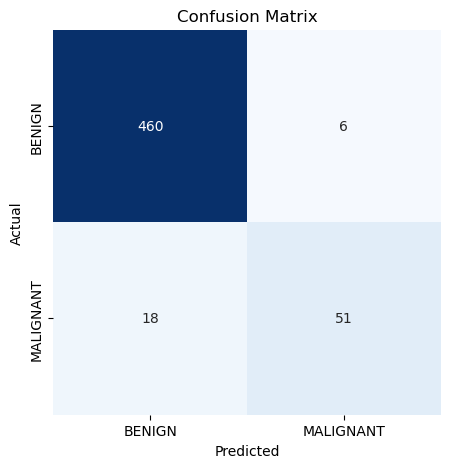

Classification Report:
------------------------------
               precision    recall  f1-score   support

      BENIGN       0.96      0.99      0.97       466
   MALIGNANT       0.89      0.74      0.81        69

    accuracy                           0.96       535
   macro avg       0.93      0.86      0.89       535
weighted avg       0.95      0.96      0.95       535



In [106]:
evaluate_model(model, X_test, y_test)

In [ ]:
0: 0.96   0.97
1: 0.75   0.81